# Project Suicide for Codecademy

This project will try to answer the following questions :
- Did the number of suicides and the rate of suicides augmented over time
- Is there a difference between the rate of suicide between white and non white 
- Did the number of homicide and the rate of homicides augmented over time
- Did the homicide with firearms agumented over time ?
- Is there a difference between the rate of homicide between white and non white
- What is the top 5 / bottom 5 of the state regarding suicide ? How did it change over time ?
- What is the top 5 / bottom 5 of the state regarding homicides ? How did it change over time ?

I will use the dataset from Harvard "Firearm Suicide Proxy for Household Gun Ownership, 1949-2020"

It can be found here : [dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/QVYDUD)


| Variable Name | Variable Description |
| --- | --- |
| state  | State name |
| year  | Year |
| division  | Census division |
| total_population  | linearly interpolated decennial Census population counts |
| fss  | Firearm suicide divided by total suicide (FS/S) |
| homicide_rate  | homicide rate per 100,000 residents |
| firearm_homicide_rate  | firearm homicide rate per 100,000 residents |
| nonfirearm_homicide_rate  | Non firearm homicide rate per 100,000 residents 
| firearm_suicides  | Count of firearm suicides |
| total_suicides  | Count of all suicides |
| firearm_homicides  | Count of firearm homicides |
| nonfirearm_homicides  | Count of all nonfirearm homicides |
| total_homicides  | Count of total homicides |
| white_fss  | FSS for white population |
| nonwhite_fss  | FSS for nonwhite population |
| nextyearfss  | Next year's FS/S |
| nextyearnonwhitefss  | Next year's nonwhite FS/S |
| nextyearwhitefss  | Next year's white FS/S |

In [78]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)

df = pd.read_csv('Firearm_suicide_homicide_dataset.csv')
df.head()


,year,state,division,total_population,fss,homicide_rate,firearm_homicide_rate,nonfirearm_homicide_rate,firearm_suicides,total_suicides,firearm_homicides,nonfirearm_homicides,total_homicides,white_fss,nonwhite_fss,nextyearfss,nextyearnonwhitefss,nextyearwhitefss
0,1949,Alabama,East South Central,3004000.0,0.717949,14.28095872,7.822902796,6.458055925,140,195,235.0,194.0,429,0.708571,0.482655,0.688995,0.807692,0.672131
1,1949,Arizona,Mountain,726000.0,0.575000,5.64738292,3.168044077,2.479338843,46,80,23.0,18.0,41,0.583333,0.800000,0.589474,0.625000,0.586207
2,1949,Arkansas,West South Central,1835000.0,0.671053,7.901907357,4.141689373,3.760217984,102,152,76.0,69.0,145,0.664336,0.500000,0.644444,0.750000,0.632812
3,1949,California,Pacific,10499000.0,0.382623,4.61948757,1.857319745,2.762167826,709,1853,195.0,290.0,485,0.382187,0.777778,0.378732,0.367647,0.379142
4,1949,Colorado,Mountain,1249000.0,0.551570,5.044035228,3.442754203,1.601281025,123,223,43.0,20.0,63,0.559633,0.392405,0.462687,0.000000,0.467337


In [84]:
df.info()

#I check the duplicates : there are not any
len(df)-len(df.drop_duplicates())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      3651 non-null   int64  
 1   state                     3651 non-null   object 
 2   division                  3651 non-null   object 
 3   total_population          3650 non-null   float64
 4   fss                       3651 non-null   float64
 5   homicide_rate             3651 non-null   object 
 6   firearm_homicide_rate     3651 non-null   object 
 7   nonfirearm_homicide_rate  3651 non-null   object 
 8   firearm_suicides          3651 non-null   int64  
 9   total_suicides            3651 non-null   int64  
 10  firearm_homicides         3650 non-null   float64
 11  nonfirearm_homicides      3650 non-null   float64
 12  total_homicides           3651 non-null   int64  
 13  white_fss                 3644 non-null   float64
 14  nonwhite

0

In [61]:
df.describe()

,year,total_population,fss,firearm_suicides,total_suicides,firearm_homicides,nonfirearm_homicides,total_homicides,white_fss,nonwhite_fss
count,3642.000000,3.642000e+03,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,1984.661175,4.741430e+06,0.552637,300.733937,565.484898,218.247941,115.235859,333.482702,0.554733,0.487037
std,20.707003,5.403773e+06,0.148967,322.865001,638.168654,314.816117,160.912134,462.895782,0.154396,0.254801
min,1949.000000,1.590000e+05,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1967.000000,1.201363e+06,0.468234,90.000000,158.000000,24.000000,20.000000,45.000000,0.469425,0.333333
50%,1985.000000,3.094711e+06,0.567017,201.000000,380.000000,104.000000,67.000000,176.000000,0.569707,0.500000
75%,2003.000000,5.710904e+06,0.661765,406.000000,700.000000,288.750000,141.750000,433.000000,0.665295,0.666667
max,2020.000000,3.955704e+07,0.891304,2287.000000,4491.000000,3183.000000,2235.000000,4232.000000,0.904762,2.281346


**I will treat the missing values. First I will remove the last three columns as they are redundant.
Then I will calculate the median per state to fill in 'nonwhite_fss' and I will remove the few NA from the other columns**

In [58]:
df = df.drop(columns = ['nextyearfss', 'nextyearnonwhitefss', 'nextyearwhitefss'])

In [59]:
df.isna().sum()

year                          0
state                         0
division                      0
total_population              1
fss                           0
homicide_rate                 0
firearm_homicide_rate         0
nonfirearm_homicide_rate      0
firearm_suicides              0
total_suicides                0
firearm_homicides             1
nonfirearm_homicides          1
total_homicides               0
white_fss                     7
nonwhite_fss                406
dtype: int64

In [60]:
na_counts = df.groupby('state')['nonwhite_fss'].apply(lambda x: x.isna().sum())
for state in na_counts.index:
    df.loc[df['state'] == state, 'nonwhite_fss'] = df.loc[df['state'] == state, 'nonwhite_fss'].fillna((df.loc[df['state'] == state, 'nonwhite_fss']).median());

df = df.dropna()

**I will now search for outliers**

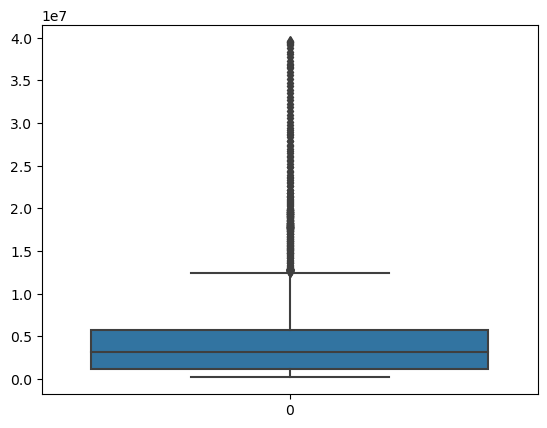

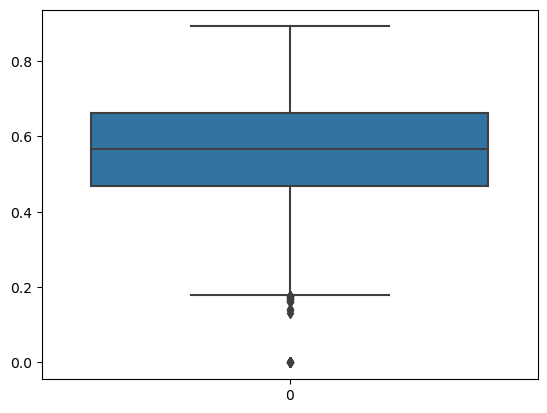

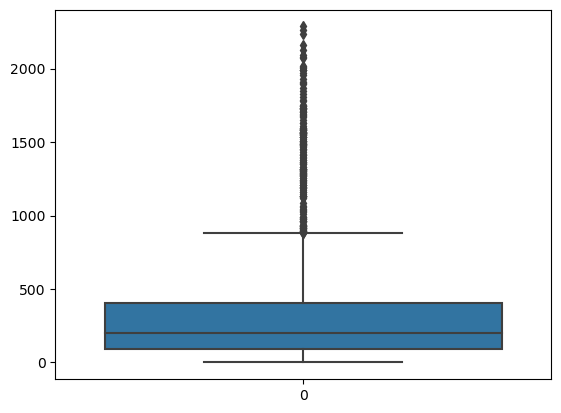

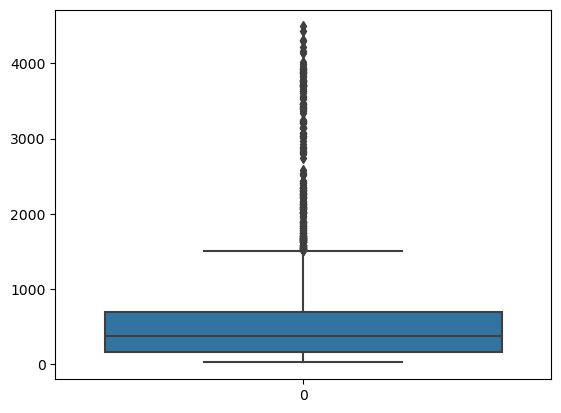

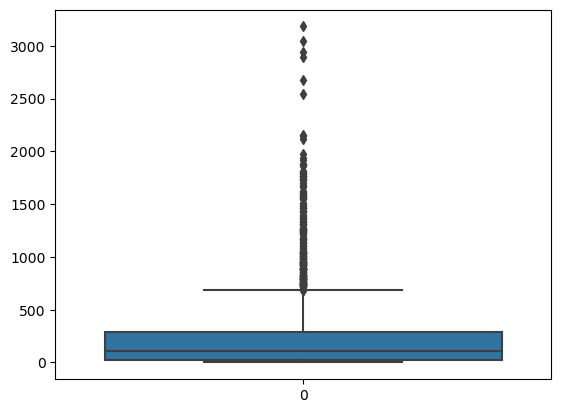

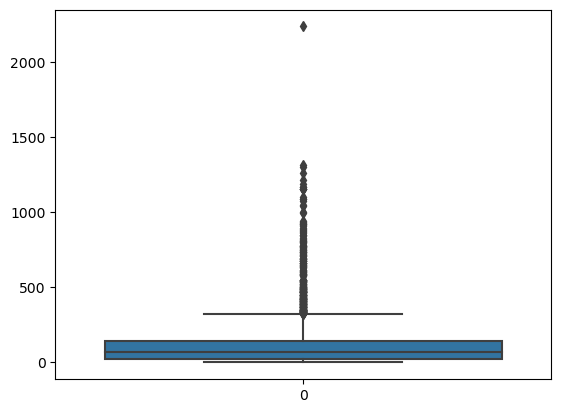

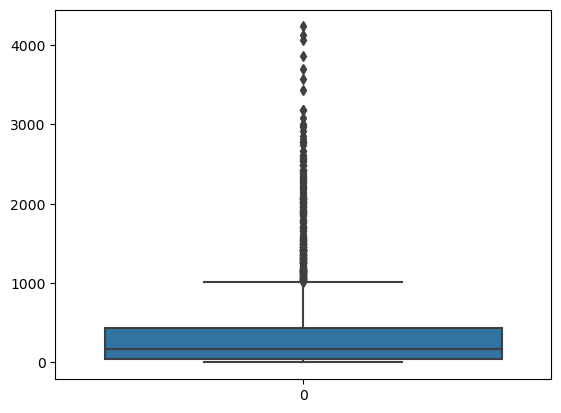

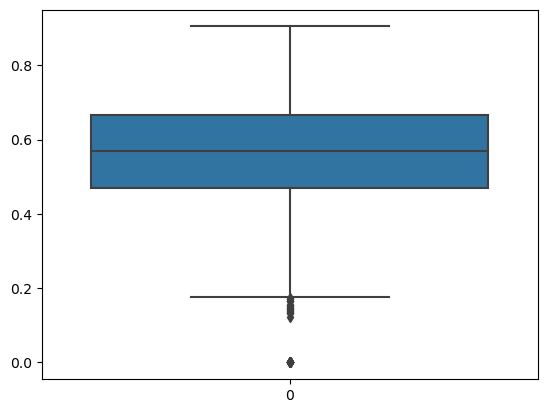

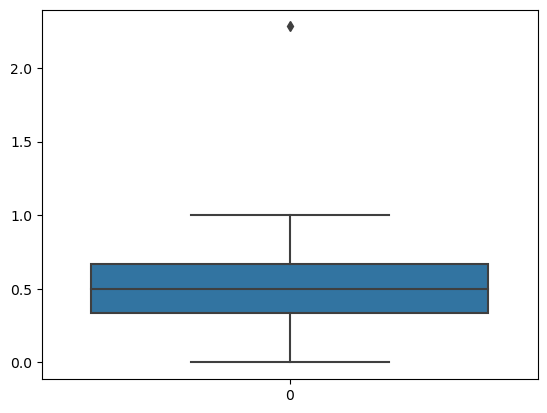

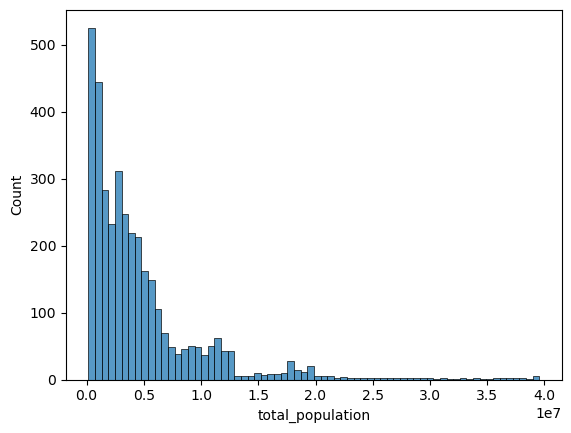

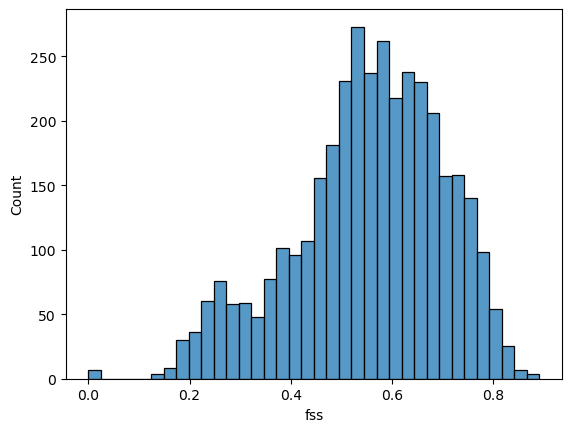

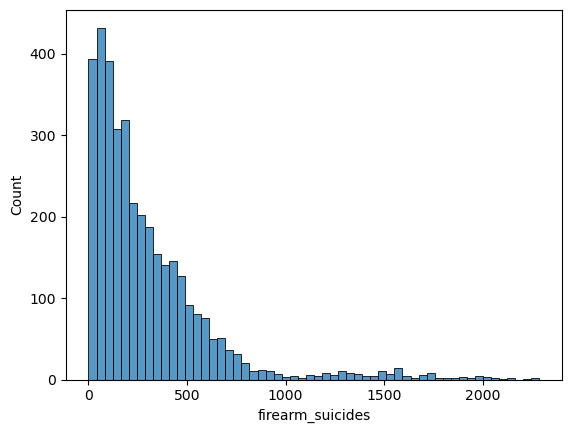

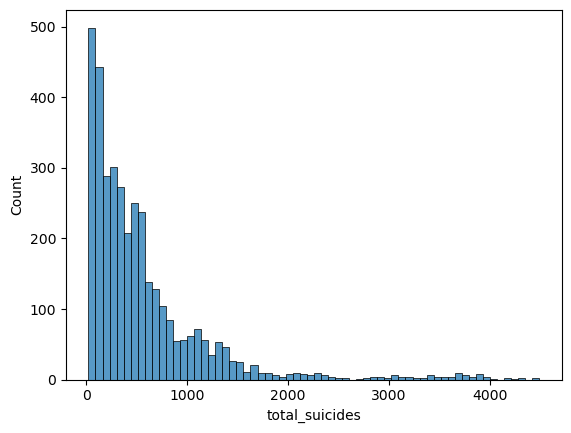

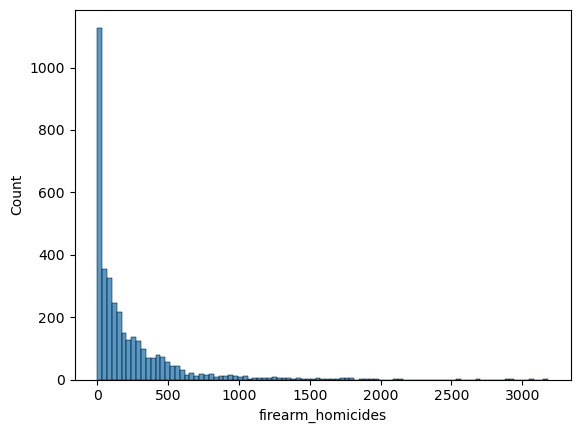

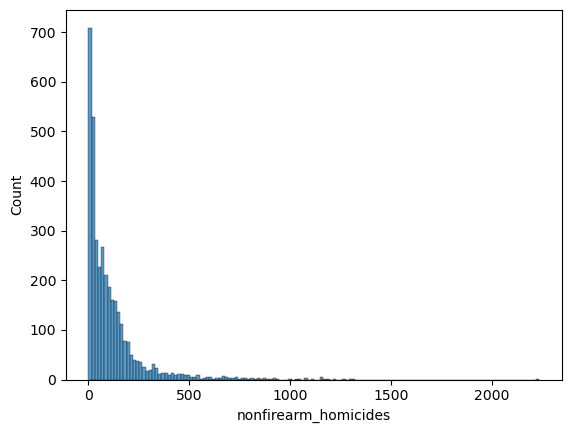

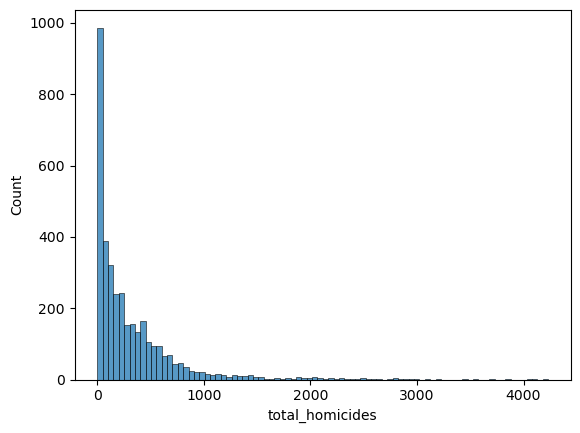

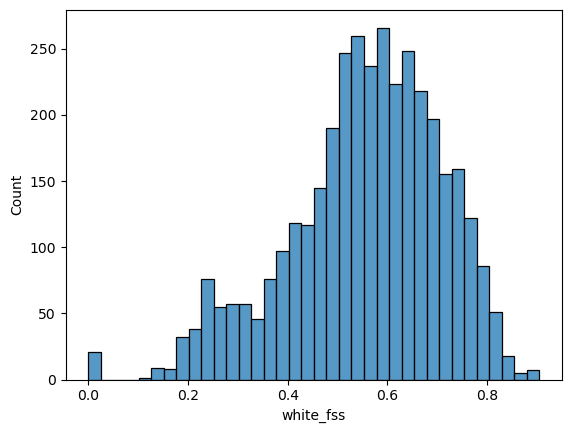

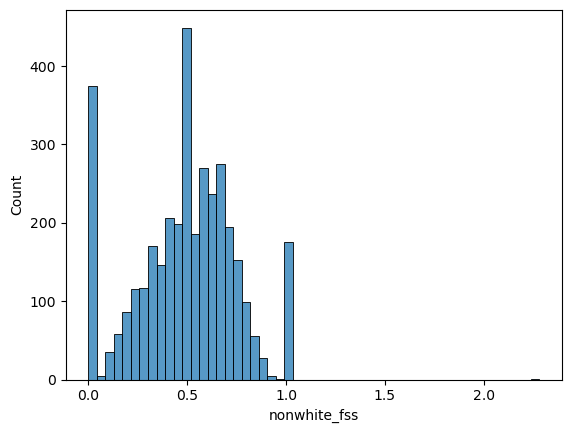

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['total_population', 'fss', 'firearm_suicides', 'total_suicides', 'firearm_homicides', 'nonfirearm_homicides', 'total_homicides', 'white_fss', 'nonwhite_fss']
for col in cols:
    sns.boxplot(df[col])
    plt.show()

for col in cols:
    sns.histplot(x= df[col])
    plt.show()